# Einführung in Python und Jupyter Notebooks Kapitel 2 Teil 2
entwickelt und entworfen von Eugenio Tufino und Micol Alemani

# Methode der kleinsten Quadrate

In diesem Notebook lernen Sie die Durchführung einer linearen Regression in Python mit der Methode der kleinsten Quadrate sowohl ohne als mit Gewichtung der Datenpunkte. Außerdem lernen Sie die Berechnung von statistischen Größen wie dem Bestimmtheitsmaß $r^2$ und dem reduzierten Chi-Quadrat.

Die Methode der kleinsten Quadrate soll genutzt werden, um die beste Anpassung einer Geraden an einen experimentellen Datensatz $(x_i,y_i)$ zu ermitteln und dabei herauszufinden, ob die Daten in einem linearen Zusammenhang stehen.

Es wird dafür ein lineares Modell der Form: $y= b*x +a$ genutzt, wobei $b$ und $a$ Konstanten sind, die der Steigung und dem Achsenabschnitt der Geraden entsprechen.


Die **Residuen** definieren wir als die Differenz ($y_i - y = y_i - b*x +a$) zwischen dem experimentellen Wert $i$ der abhängigen Messgröße $y_i$ und dem aus dem Modell vorhergesagten Wert $y$.

**Die Methode der kleinsten Quadrate besteht daraus, die Parameter a und b zu finden, welche die Summe der Quadrate der Residuen minimieren!**


**Achtung:** In diesem Notebook werden wir zwei verschiedene Datensätze analysieren. Seien Sie vorsichtig bei der Wahl Ihrer Datenvariablen und vermischen Sie die Datensätze nicht!

Zunächst werden alle benötigten Module importiert:

In [ ]:
# importieren Sie alle benoetigten Module
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit


Bevor wir die Methode der kleinsten Quadrate weiter diskutieren, sollen einige weitere nützliche Eigenschaften von Python betrachtet werden.




**Definition allgemeiner Werte von Parameter für Diagramme:**

Da im Folgenden mehrere Graphen erstellt werden sollen, setzen wir einige Parameter (z.B. Größe des Titels, Legende, etc.) bereits am Anfang des Notebooks fest. Auf diese Weise müssen sie nicht für jedes Diagramm einzeln definiert werden. Sie können dies auch in eigenen zukünftigen Notebooks tun.


In [ ]:
plt.rcParams['figure.figsize'] = (10,5) # Groesse der Abbildung
plt.rcParams['font.size'] = 16    # Schriftgroesse des Textes
plt.rcParams['legend.fontsize'] = 14  # Schriftgoesse der Legende
#plt.rcParams['lines.linestyle'] = '--'  # Wenn benoetigt, kann die Linienart spezifiziert werden
#plt.rcParams['lines.linewidth'] = 2    # Linienstaerke


Die folgenden Messdaten beschreiben den Betrag der Auslenkung einer Feder $\Delta s$ bei Verformung durch Anhängen bekannter Massen.

|Δs(cm)|Masse(kg)|
|--|--|
|42.0 | 2|
|48.4 |	4|
|51.3	| 6|
|56.3	| 8|
|58.6	| 10|


### Darstellung von Daten mit Pandas DataFrame und Erstellung eines Graphen
Im folgenden Beispiel wird gezeigt, wie Daten im Pandas DataFrame darstellt werden. Dabei erstellen wir einen einen neuen DataFrame.

In [ ]:
feder = {'Auslenkung (cm)': [42.0,48.4,51.3,56.3,58.6],
            'Masse (kg)': [2,4,6,8,10]} # die Daten werden mit einem Dictionary und einer Liste definiert
df_feder = pd.DataFrame(data=feder) # der Befehl 'df' (data frame) erzeugt ein Panda DataFrame

In [ ]:
df_feder.head() # zeigt die Strukur des DatenFrames (standardmaessig werden nur die ersten 5 Zeilen angezeigt)

,Auslenkung (cm),Masse (kg)
0,42.0,2
1,48.4,4
2,51.3,6
3,56.3,8
4,58.6,10


In [ ]:
print(df_feder.columns) # die Namen der Spalten werden ausgegeben

Index(['Auslenkung (cm)', 'Masse (kg)'], dtype='object')


Den Varaiblen $x$ und $y$ werden nun die Werte der beiden Spalten zugewiesen:

In [ ]:
x_feder = df_feder['Masse (kg)'] # weist x die Werte der Spalte 'Masse (kg)' zu
y_feder = df_feder['Auslenkung (cm)'] # weist y die Werte der Spalte 'Auslenkung (cm)' zu

Die Daten sollen graphisch dargestellt werden:

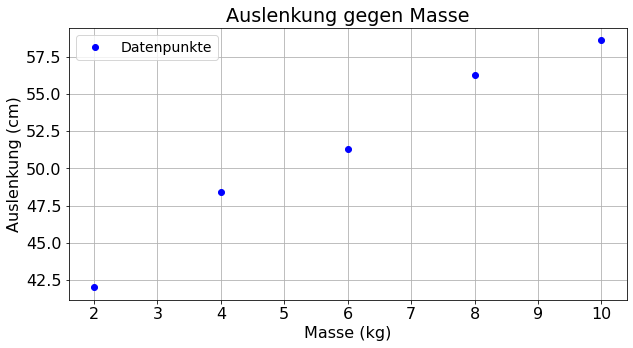

In [ ]:
plt.plot(x_feder, y_feder, 'bo', label='Datenpunkte')
plt.grid(True)
plt.legend()
plt.xlabel('Masse (kg)')
plt.ylabel('Auslenkung (cm)')
plt.title("Auslenkung gegen Masse")
plt.show()

### Ein besserer Weg, die Möglichkeiten von Pandas für graphische Darstellungen zu nutzen:
Es ist möglich, die Zuweisungen von $x$ und $y$ zu überspringen, indem die Pandas-Methode **plot.scatter** verwendet wird, um direkt auf die Spalten des DataFrames zuzugreifen. Dies ist im folgenden Beispiel zu sehen:

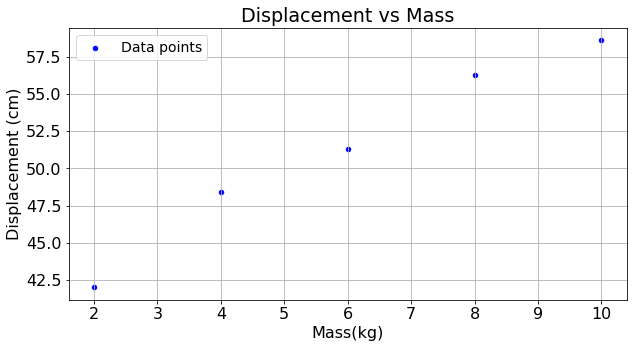

In [ ]:
df_feder.plot.scatter('Masse (kg)','Auslenkung (cm)', color='blue',label='Data points')
plt.grid(True)
plt.legend()
plt.xlabel('Mass(kg)')
plt.ylabel('Auslenkung (cm)')
plt.title("Auslenkung gegen Masse")
plt.show()

**Übung 1:**

In einem Experiment wird ein Stein mit der Anfangsgeschwindigkeit $v$ senkrecht nach oben geworfen.
Ein Student führt sieben Würfe durch, um die Beziehung zwischen $v^2$ und $h$ zu überprüfen. Erwartet wird die Form: $v^2=2gh$

Die Daten des Studenten werden in der folgenden Zelle in einem Pandas DatenFrame angezeigt.

Weisen Sie $h$ und $v^2$ den Variablen $x$ und $y$ zu und stellen Sie diese einschließlich der gegebenen Messunsicherheiten in einem $v^2(h)$-Diagramm graphisch dar.

In [ ]:
#Data

# Definieren die Daten mit einem Dictionary und einer Liste
stein = {'h (m)': [0.4,0.8,1.4,2.0,2.6,3.4,3.8], 'v^2 (m/s)^2': [7,17,25,38,45,62,72], 'Unsicherheit von v^2 (m/s)^2':[3,3,3,4,5,5,6]}
stein_df=pd.DataFrame(data=stein)
stein_df.head()

,h (m),v^2 (m/s)^2,Unsicherheit von v^2 (m/s)^2
0,0.4,7,3
1,0.8,17,3
2,1.4,25,3
3,2.0,38,4
4,2.6,45,5


Zum Darstellen der Fehlerbalken der $y_i$-Datenpunkte wird die Funktion **errorbar** genutzt. Ihre Funktionsweise ähnelt der gewöhnlichen **plot**-Funktion stark.

### polyfit-Funktion (optional)

Es wäre möglich, eine eigene Funktion für die Methode der kleinsten Quadrate zu implementieren, allerdings liefern Python-Module bereits eine Vielzahl an Lösungen. Eine Möglichkeit, die Parameter $a$ und $b$ zu finden, welche die Gerade optimieren, bietet die Funktion [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html).
Ihre allgemeine Syntax lautet:

```
# np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
```

Der dritte Parameter **deg** der Funktion **polyfit**, ermöglicht den Grad des Polynoms für die Anpassung festzulegen.

Um eine Gerade anzupassen, wird `deg=1` gewählt.

Im folgenden Beispiel wird die Funktion "polyfit" für die Anpassung eines linearen Graphen auf den Federdaten genutzt.

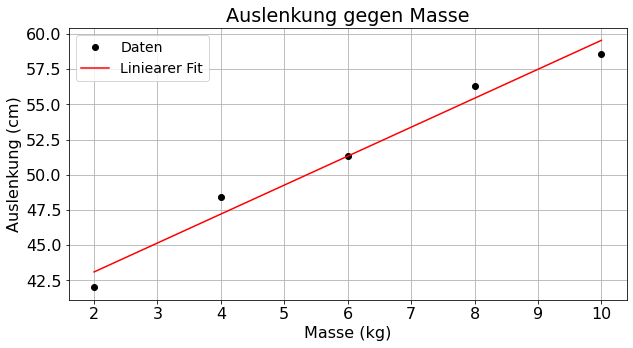

Die beste Ausgleichsgerade hat folgende Parameter: 
======y=bx+a===========

b= 2.05 cm/kg
a=38.99 cm



In [ ]:
b, a,  = np.polyfit(x_feder,y_feder,deg=1) # polyfit liefert die Parameter Anstieg und y-Schnittpunkt. Diese werden den Parameter b und a zugeordnet
plt.plot(x_feder, y_feder,'ko', label='Daten')
plt.plot(x_feder, b*x_feder+a,'r',label='Liniearer Fit')
plt.grid(True)
plt.legend()
plt.xlabel('Masse (kg)')
plt.ylabel('Auslenkung (cm)')
plt.title("Auslenkung gegen Masse")
plt.show()
print("Die beste Ausgleichsgerade hat folgende Parameter: ")
print("======y=bx+a===========\n")
print("b={:5.2f} cm/kg".format(b))
print("a={:5.2f} cm".format(a))
print()

## Ende des optionalen Teils. Ab hier müssen alle Studierende alles weiter bearbeiten!

### Curve_fit-Funktion

Um beliebige Funktionen anzupassen, kann die Funktion `curve_fit` aus dem **Scipy**-Paket genutzt werden.

```python
 from scipy.optimize import curve_fit
 scipy.optimize.curve_fit(func, x, y)
```

Sie ermöglicht es, die Form der Anpassungsfunktion `func` selbst festzulegen.

Wird die Funktion für eine lineare Anpassung genutzt, gibt sie zwei Numpy-Arrays zurück. Dabei enthält das Erste die optimalen Werte für die Steigung $b$ und Achsenschnitt $a$ bezogen auf die untersuchten Daten und das Zweite die zugehörige Kovarianzmatrix.


**Anmerkung für zukünftige Versuche**: Ist die Anpassung nicht linear, müssen in `curve_fit` Anfangswerte für die Anpassungsparameter angegeben werden, da der Prozess durch iterativen Wiederholungen erfolgt. \
z.B. $a_{Anfang}=1$ und $b_{Anfang}=1$

### Definition einer linearen Anpassungsfunktion unter Verwendung von **curve_fit**:

In [ ]:
def linear_fit(x,b,a):
    return b*x+a

Die Funktion **curve_fit** wird auf die Daten der Feder angewendet:

In [ ]:
parameter, parameter_kovarianzen = curve_fit(linear_fit, x_feder, y_feder)
# die Parameter der linearen Anpassung werden in dem Array 'parameter' gespeichert (in diesem Fall parameter[0]=b und parameter[1]=a)
# es wird ausserdem die Kovarianzmatrix bestimmt und der Variablen "parameter_kovarianzen" zugewiesen

Die Funktion **curve_fit** gibt die Elemente `parameter` und `parameter_kovarianzen` zurück.
Das Argument `parameter` enthält die optimalen Werte der Anpassungs-Parametern $b$ und $a$. Diese Werte sollen nun ausgegeben werden:

In [ ]:
anstieg = parameter[0]
intercept = parameter[1]
print("Der Anstieg der linear_fit Funktion beträgt:{:5.2f} cm/kg".format(anstieg))
print("Der Achsenabschnitt der linear_fit Funktion beträgt:{:5.2f} cm".format(intercept))

Der Anstieg der linear_fit Funktion ist: 2.06 cm/kg
Der Intercept der linear_fit Funktion ist:38.99 cm


Der zweite Parameter `parameter_kovarianzen` entspricht der Kovarianzmatrix. Aus dieser können die Unsicherheiten der Steigung und des Achsenabschnitts entnommen werden, da sie den Werten auf der Diagonalen der Kovarianzmatrix entsprechen. Es sollen im Folgenden diese Unsicherheiten ausgegeben werden:


In [ ]:
u_anstieg = np.sqrt(parameter_kovarianzen [0][0])  # Unsicherheit des Anstieges
u_intercept= np.sqrt(parameter_kovarianzen [1][1]) # Unsicherheit des Achsenabschnitts
print("Unsicherheit des Anstieges u_b={:5.2f} cm/kg".format(u_anstieg))
print("Unsicherheit des Achsenabschnitts u_a={:5.2f} cm".format(u_intercept))

Unsicherheit des Anstieges u_b= 0.19 cm/kg
Unsicherheit des Achsenabschnittes u_a= 1.25 cm


Nun werden die Daten der Feder zusammen mit der durch `curve_fit` berechneten Anpassungsgerade graphisch dargestellt:

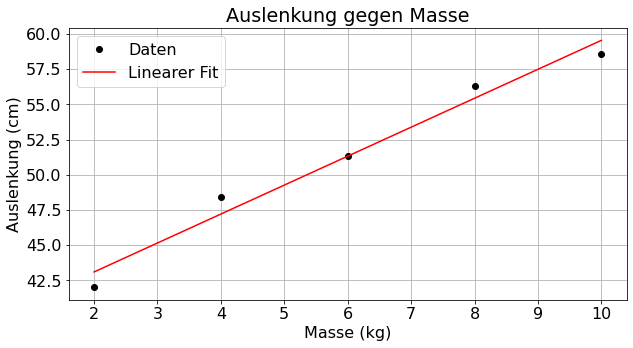

Die beste Ausgleichsgerade hat folgende Parameter: 
======y=bx+a===========

b= 2.06 cm/kg
a=38.99 cm


In [ ]:
plt.plot(x_feder, y_feder,'ko', label='Daten')
plt.plot(x_feder, anstieg*x_feder+intercept,'r',label='Linearer Fit')
plt.grid(True)
plt.legend(fontsize=16)
plt.xlabel('Masse (kg)', fontsize=16)
plt.ylabel('Auslenkung (cm)',fontsize=16)
plt.title("Auslenkung gegen Masse")
plt.show()
print("Die beste Ausgleichsgerade hat folgende Parameter: ")
print("======y=bx+a===========\n")
print("b={:5.2f} cm/kg".format(anstieg))
print("a={:5.2f} cm".format(intercept))

### Berechnung des Bestimmtheitsmaßes $r^2$

Im folgenden Code wird das Bestimmtheitsmaß für das Beispiel der Feder anhand einer einfachen Formel berechnet. Die folgende Formel basiert auf der Nutzung von Residuen.

In [ ]:
x_data=x_feder # die Daten der DataFrame werden zu x_data hinzugefügt
y_data=y_feder # die Daten der DataFrame werden zu y_data hinzugefügt

residuen = y_data- linear_fit(x_data,anstieg,intercept) # Berechnnung der Residuen
ss_res = np.sum(residuen**2) # hier berechnen wir die Summe der Residuen zum Quadrat
ss_tot = np.sum((y_data-np.mean(y_data))**2) # Berechnung der Varianz in den y-Daten
r_quadrat = 1 - (ss_res / ss_tot) # Formel zur Berechnung des Bestimmtheitsmasses
print ("r^2 =",r_quadrat) # Ausgabe des Bestimmtheitsmasses

r^2 = 0.9753620343210847


### Die Residuen

Bei der Durchführung von Experimenten ist es nützlich, die Residuen $y_i-bx-a$ aufzuzeichnen, da sie helfen können, systematische Fehler in experimentellen Daten zu detektieren.
Ist das Modell einer linearen Anpassungsfunktion gut geeignet, sollten die Residuen zufällige Schwankungen um den Wert Null aufweisen und keinem offensichtlichen Trend folgen. Ist jedoch ein solcher Trend erkennbar, obwohl das lineare Modell sinnvoll gewählt wurde, könnte dies auf systematische Abweichungen in den Daten hinweisen. In diesem Fall sollten zunächst die systematischen Effekte behoben werden.


Im folgenden Code werden die Residuen für die Federdaten berechnet.

**Kommentar:** Um eine Abbildung mit zwei oder mehr Untergraphiken zu erstellen, kann die Matplotlib-Funktion `subplots` verwendet werden.

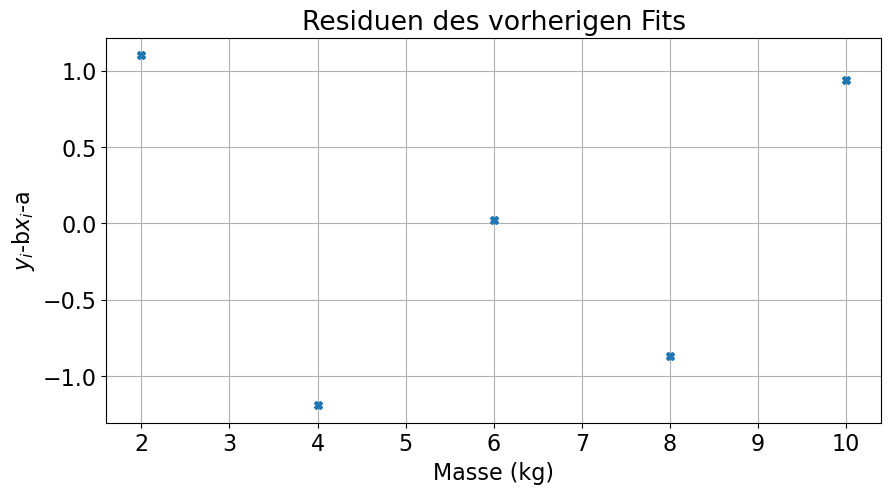

In [ ]:
# x_data und y_data sowie Steigung und Achsenabschnitt der zugehörigen Anpassung
x_data=x_feder
y_data=y_feder
residuen=anstieg*x_data+intercept-y_data
plt.plot(x_data, residuen, 'X',label='Residuen')
plt.title("Residuen der vorherigen Anpassung")
#plt.legend(loc='lower right')
plt.xlabel('Masse (kg)')
plt.ylabel('$y_i$-b$x_i$-a')
plt.grid()
plt.show()

**Übung 2:**

Finden Sie die beste Anpassungsgerade für die Messwerte der vorherigen Übung (Geschwindigkeit des Steins) und tragen Sie diese Daten ein. Ermitteln Sie die Steigung und beurteilen Sie, ob das Ergebnis mit dem Literaturwert von $g=9,81 m/s^2$ übereinstimmt.
Es gilt die Annahme, dass die Unsicherheiten der x-Werte vernachlässigbar und die Unsicherheiten der aller y-Werte gleich sind. Daher sollte hier die Methode der kleinsten Quadrate ohne Gewichtung verwendet werden.
Die Daten sind im obigen DataFrame stein_df gespeichert.

**Übung 3:**
Berechnen Sie den Wert von $r^2$ für das obige Experiment mit dem Stein.

### Beste Anpassung mit variablen Unsicherheiten (Methode der gewichteten kleinsten Quadrate)

Gegeben ist ein Satz von N Datenpunkten $(x_i,y_i)$. Die Unsicherheiten der Werte $x_i$ können als vernachlässigbar angenommen werden, während die Werte $y_i$ variable Messunsicherheiten $\sigma_i$ aufweisen. Wie bereits aus den vorherigen Lektionen dieses Kurses bekannt ist, wird in diesem Fall jedem Messwert $y_i$ ein Gewicht $w_i=1/\sigma_i^2$ zugeordnet.
Anschließend werden die Daten mit einer linearen Funktion $y=bx+a$ unter Verwendung dieser Gewichtung angepasst.

Im Folgenden wird nun die Methode der gewichteten kleinsten Quadrate auf das Feder-Experiment angewendet.

Betrachten Sie den gleichen Datensatz des Feder-Experiments und fügen Sie die Unsicherheiten bei den Messungen der Verschiebungen $y_i$ hinzu, wie im folgenden Code gezeigt:

In [ ]:
feder_mit_unsicherheiten = {'Auslenkung (cm)': [42.0,48.4,51.3,56.3,58.6],
            'Masse (kg)': [2,4,6,8,10],'Unsicherheiten Auslenk. (cm)':[1.2,3.7,2.1,3.4,1.8]}

Ein neues Pandas-Datenframe wird definiert:

In [ ]:
df2=pd.DataFrame(data=feder_mit_unsicherheiten)   # definiert neues DataFrame

und angezeigt:

In [ ]:
df2.head()

,Auslenkung (cm),Masse (kg),Unsicherheiten Auslenk. (cm)
0,42.0,2,1.2
1,48.4,4,3.7
2,51.3,6,2.1
3,56.3,8,3.4
4,58.6,10,1.8


Im folgenden Code werden die Variablen den Werten im DataFrame zugeordnet:

In [ ]:
x2= df2['Masse (kg)']
y2=df2['Auslenkung (cm)']
yerr2=df2['Unsicherheiten Auslenk. (cm)']

Zur Darstellung der Fehlerbalken wird die Funktion `errorbar`verwendet:

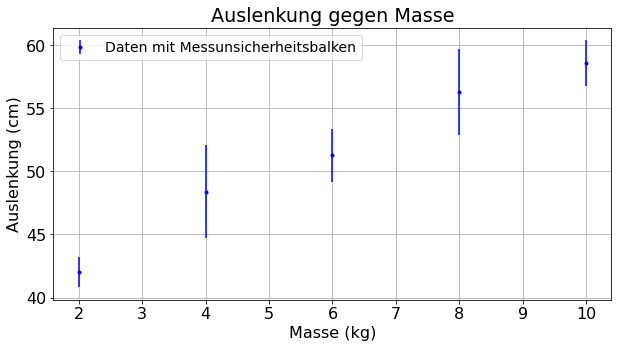

In [ ]:
# Erstellen Sie ein Diagramm, welches die Daten mit Fehlerbalken anzeigt
plt.errorbar(x2,y2,yerr2,fmt='b.',label='Daten mit Messunsicherheitsbalken')
plt.grid(True)
plt.legend(loc="upper left")  # Ort der Legende
plt.xlabel('Masse (kg)')
plt.ylabel('Auslenkung (cm)')
plt.title("Auslenkung gegen Masse")
plt.show()

**Darstellung von Fehlerbalken im Diagramm mit Käppchen:**

Fehlerbalken können auch mit Käppchen dargestellt werden. Dazu müssen Sie lediglich `capsize = font size` zum Argument **plt.errorbar** hinzufügen. Für das obige Beispiel würde dies wie folgt aussehen:
```python
plt.errorbar(x2,y2,yerr2,fmt='b.',label='Daten mit Messunsicherheitsbalken', capsize=10)
```
Versuchen Sie es selbst!

Die zuvor verwendete Funktion **curve_fit** wird nun um das Argument `sigma=yerr` erweitert. Außerdem muss die Variable `absolute_sigma=True` ergänzt werden:

In [ ]:
params, params_covariance = curve_fit(linear_fit, x2, y2,sigma=yerr2,absolute_sigma=True)
print(params) # optimale Werte für die Parameter, welche die Summe der quadrierten Residuen minimieren.
print(params_covariance)   # geschätzte Kovarianz von params

[ 2.11443674 38.05309837]
[[ 0.06652116 -0.32653028]
 [-0.32653028  2.32256645]]


Die Variable `params` enthält die Werte der Parameter $b$ und $a$ (`params[0]` und `params[1]` ) für die beste Anpassung. Daraus ergibt sich:

$ y =params[0]* x +params[1]$


Die Variable `params_covariance` enthält die Kovarianzmatrix, aus welcher sich die Unsicherheiten für Steigung und Achsenabschnitt berechnen lassen. Die Kovarianzmatrix hat die folgende Form:
$$ \left(
\begin{array}
\ C_{00} & C_{10} \\
 C_{01} & C_{11}
\end{array}\right)$$

Zur Bestimmung der Unsicherheiten werden die Diagonalelemente der Matrix genutzt.\
Die Unsicherheit der Steigung (`params[0]`) ergibt sich aus:

$$\sigma_{params[0]}=\sqrt{C_{00}}$$

und die des Achsenabschnitts (`params[1]`) aus:

$$\sigma_{params[1]}=\sqrt{C_{11}}$$


Die restlichen Elemente der Kovarianzmatrix beschreiben die Kovarianz zwischen den beiden verschiedenen Parametern (Steigung und Achsenabschnitt), allerdings würden weitere ausführliche Erläuterungen den Rahmen dieses Kurses überschreiten.


Siehe Ref. [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [ ]:
anstieg = params[0] # anstieg b
achsenabschnitt = params[1]   # Achsenabschnitt a
u_anstieg= np.sqrt(params_covariance[0][0]) # Unsicherheit des Anstieges
u_achsenabschnitt = np.sqrt(params_covariance[1][1])   # unsicherheit des Achsenabschnittes
print("Anstieg=", anstieg, "cm/kg\n", "u_Anstieg=",u_anstieg, "cm/kg\n", "Achsenabschnitt=", achsenabschnitt,"cm\n", "u_Achsenabschnitt=",u_achsenabschnitt, "cm\n") #das Symbol \n wird zum Einfügen einer neuen Zeile verwendet

Anstieg= 2.1144367388233323 cm/kg
 u_Anstieg= 0.25791696530219727 cm/kg
 Achsenabschnitt= 38.053098371458425 cm
 u_Achsenabschnitt= 1.5239968651948332 cm



Nun soll ein Diagramm mit den Daten und der Ausgleichsgerade
der neuen Anpassung erstellt werden:

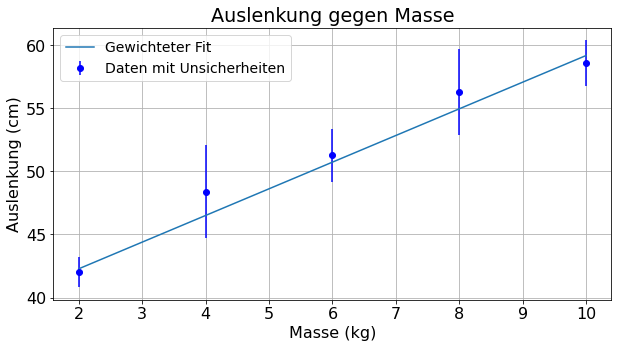

In [ ]:
# Erstellen Sie ein Diagramm mit den Daten und dazugehoerigen Fehlerbalken
plt.errorbar(x2,y2,yerr2,fmt='bo',label='Daten mit Unsicherheiten')

# Erstellen Sie ein Diagramm inklusiv der besten Anpassungsgerade an die Daten

plt.plot(x2,anstieg*x2+achsenabschnitt,label='Gewichtete Anpassungsgerade')
plt.grid()
plt.legend()
#plt.legend(loc='upper left') # mit dem Parameter 'loc' kann der Ort der Legende bestimmt werden
plt.xlabel('Masse (kg)')
plt.ylabel('Auslenkung (cm)')
plt.title("Auslenkung gegen Masse")
plt.show()

Eine weitere Möglichkeit, das Ergebnis der besten Anpassung auszugeben, ist Folgende:

In [ ]:
print('Die Steigung ist b ={:5.1f} cm/kg, mit der Unsicherheit {:5.1f} cm/kg'.format(anstieg,u_anstieg))
print('Der Achsenabschnitt ist a= {:5.1f} cm, mit der Unsicherheit {:5.1f} cm'.format(achsenabschnitt,u_achsenabschnitt))

Die Steigung ist b =  2.1 cm/kg, mit der Unsicherheit   0.3 cm/kg
Der Achsenabschnitt ist a=  38.1 cm, mit der Unsicherheit   1.5 cm


## Chi-Quadrat und reduziertes Chi-Quadrat

Im Folgenden werden die  Werte von Chi-Quadrat und dem reduzierten Chi-Quadrat berechnet. \
Das **Chi-Quadrat** ist gegeben durch:

$$χ^2 = \sum_{i=1}^nw_i[y_i-(bx_i+a)]^2$$

Das **reduzierte Chi-Quadrat** ist wie folgt definiert:


$$\chi_{r}^2 = \frac{χ^2}{d} = \frac{χ^2}{N-2}$$


mit $d$ als Anzahl der Freiheitsgrade der Anpassung (oft als $dof$ bezeichnet). Diese Anzahl entspricht der Differenz aus der Anzahl der Messungen $N$ und der Zahl der bestimmten Parameter. Im Falle einer linearen Anpassung ist $d$ gleich $N-2$ mit den beiden Parametern Steigung und Achsenabschnitt.

Eine Anpassung kann als gut angesehen werden, wenn gilt:


**$\chi_{r}^2$ $\approx$ 1**



Im folgenden Code wird eine Funktion zur Berechnung des **reduzierten Chi-Quadrats** definiert:

In [ ]:
def reduziertes_chi_quadrat(x, y, yerr, f, *args):
    '''rreduzierte Chi-Quadrat-Funktion
    x, y und yerr sind Numpy-Arrays, die sich auf die Daten x, y und yerr beziehen
    f ist die Funktion, die wir anpassen.
    args sind die Argumente der Funktion, die wir angepasst haben.
    '''
    # in Python steht in dreifachen Anführungszeichen für eine allgemeinere Kategorie von Kommentaren, die sogenannten "docstrings". Sie werden in Funktions- oder Moduldefinitionen verwendet.
    return 1/(len(x)-len(args))*np.sum((f(x, *args)-y)**2/yerr**2)

**Übung 'Probieren Sie es selbst':**
Schreiben Sie `help(reduziertes_chi_quadrat)`, was lesen Sie?

In [ ]:
# Loesung
help(reduziertes_chi_quadrat)

Help on function reduziertes_chi_quadrat in module __main__:

reduziertes_chi_quadrat(x, y, yerr, f, *args)
    rreduzierte Chi-Quadrat-Funktion 
    x, y und yerr sind Numpy-Arrays, die sich auf die Daten x, y und yerr beziehen
    f ist die Funktion, die wir anpassen. 
    args sind die Argumente der Funktion, die wir angepasst haben.



Nun wird das reduzierte Chi-Quadrat für die Daten der Feder mit Unsicherheiten berechnet:

In [ ]:
reduziertes_chi_quadrat(x2,y2,yerr2,linear_fit, *params)

0.21686948611274193

**Übung 4:**

Ermitteln Sie die **gewichtete** beste Anpassungsgerade für das obige Steinwurf-Experiment und tragen Sie Ihre Ergebnisse ein. Ermitteln Sie die Steigung und diskutieren Sie, ob die Ergebnisse mit dem Wert von $g=9.81m/s^2$ übereinstimmen. Berechnen Sie auch das reduzierte Chi-Quadrat. Beachten Sie, dass die Daten in dem Datenrahmen stein_df gespeichert sind.

**Wichtige Anmerkung:** Im letzten Beispiel wurde eine Funktion zur Berechnung des reduzierten Chi-Quadrats definiert. Um den Code dieses Notebooks zu optimieren, könnten Sie für die Berechnung des Bestimmtheitsmaßes und für die Erstellung von Diagrammen ebenfalls Funktionen definieren...

In einem separaten Notebook finden Sie ein Beispiel für die Verwendung der Funktion **curve_fit** in einem physikalischen Experiment. Darin wird die Funktion genutzt, um die Beziehung zwischen der Beleuchtungsstärke einer Glühbirne in Abhängigkeit vom Abstand zu einem Smartphone-Lichtsensor zu ermitteln. Sie können sich dieses Notebook selbstständig ansehen.

## **Achtung:**

Vergessen Sie nicht, ihr Notebook zu speichern, bevor Sie es schließen!!!

## Schluss:

HERZLICHEN GLÜCKWUNSCH!!!!!!!! Sie sind am Ende dieser Einführung in Jupyter Notebooks und Python-Programmierung angekommen :-).


Wir hoffen, dass Sie sich nun bereit fühlen, Jupyter Notebooks in Zukunft selbst zu verwenden. Natürlich erwarten wir nicht, dass Sie bereits 'fließend' in der Phyton-Programmierung sind, aber zumindest motiviert wurden weiter damit zu üben!
Sie können die Notebooks, die wir Ihnen zur Verfügung gestellt haben, in Zukunft als Leitfaden für Ihre Laboraktivitäten verwenden.

Beste Grüße,
     
    ````´´´´´        -------
      I   I         !  0 0  !
        .           !   °   !
     ^^^^^^^        !  ---  !
     
     Eugenio   und    Micol

# For Instructors only

Thank you for your interest in our activities and publications. We hope these notebooks will be helpful. If you decide to use them, we would appreciate being informed. Please don't hesitate to reach out for any additional information or clarification.